# Evaluating Relevant Features

## Part 1: Imports
### Import Required Packages

In [2]:
import numpy    as np
import pandas   as pd
import re
import os
import sys
import seaborn as sns 
import yellowbrick as yb
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings

## Sklearn
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import Imputer, FunctionTransformer, StandardScaler
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LinearRegression, Lasso, RidgeClassifier
from sklearn.model_selection import train_test_split


## YellowBrick
from yellowbrick.features import ParallelCoordinates
from yellowbrick.features import Rank2D
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.features import Rank1D, Rank2D
from yellowbrick.features.importances import FeatureImportances
from sklearn.linear_model import LassoCV




### Import Custom Modules

In [15]:
wd = os.getcwd()
mod_dir     = wd + '/../custom_modules/'
sys.path.insert(0, mod_dir)
import cleaning_helpers as helpers

### Change Defaults

In [16]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
warnings.filterwarnings('ignore')

## Import Data

In [17]:
path = wd + '/../../../med_school_data/output/'
file_name = 'final_data.csv'

def load_data(csv, path):
	df = pd.read_csv(path + csv)
	return df

data = load_data(file_name, path)

## Part Two: Plot distributions for target

In [18]:
data.target_indicator.sum()


52

In [23]:
pass_students = []
fail_students = []

for year in range(2009, 2016, 1):
    test = data[data.m1_fall == year]
    print(test.target_indicator.value_counts())
    pass_students.append(list(test.target_indicator.value_counts())[0])
    fail_students.append(list(test.target_indicator.value_counts())[1])

pass_students = np.array(pass_students)
fail_students = np.array(fail_students)




0    196
1      4
Name: target_indicator, dtype: int64
0    184
1      5
Name: target_indicator, dtype: int64
0    187
1      8
Name: target_indicator, dtype: int64
0    180
1     10
Name: target_indicator, dtype: int64
0    183
1     10
Name: target_indicator, dtype: int64
0    183
1     10
Name: target_indicator, dtype: int64
0    180
1      5
Name: target_indicator, dtype: int64


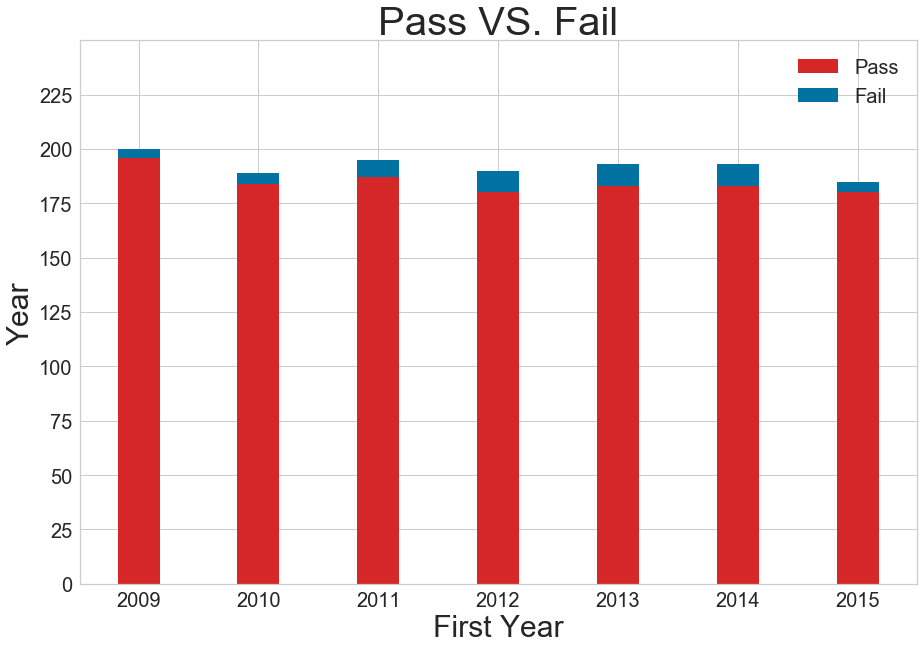

In [64]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))

import pylab as plot

params = {'legend.fontsize': 20,
          'legend.handlelength': 2}
plot.rcParams.update(params)



ind = np.array([0,1,2,3,4,5,6])
width = 0.35

p1 = plt.bar(ind, pass_students, width, color='#d62728')
p2 = plt.bar(ind, fail_students, width,
             bottom = pass_students)


plt.ylabel('Year', fontsize = 30)
plt.xlabel('First Year', fontsize = 30)
plt.title('Pass VS. Fail', fontsize = 40)
plt.xticks(ind, ('2009', '2010', '2011', '2012', '2013', '2014', '2015'), fontsize = 20)
plt.yticks(np.arange(0, 250, 25), fontsize =20)
plt.legend((p1[0], p2[0]), ('Pass', 'Fail'), loc = 'upper right')
plt.ylim(0, 250)

plt.show()

In [72]:
high_students = []
low_students = []

for year in range(2009, 2016, 1):
    test = data[data.m1_fall == year]
    print(test.danger_student.value_counts())
    high_students.append(list(test.danger_student.value_counts())[0])
    low_students.append(list(test.danger_student.value_counts())[1])

high_students = np.array(high_students)
low_students = np.array(low_students)


0    149
1     51
Name: danger_student, dtype: int64
0    142
1     47
Name: danger_student, dtype: int64
0    146
1     49
Name: danger_student, dtype: int64
0    143
1     47
Name: danger_student, dtype: int64
0    143
1     50
Name: danger_student, dtype: int64
0    144
1     49
Name: danger_student, dtype: int64
0    137
1     48
Name: danger_student, dtype: int64


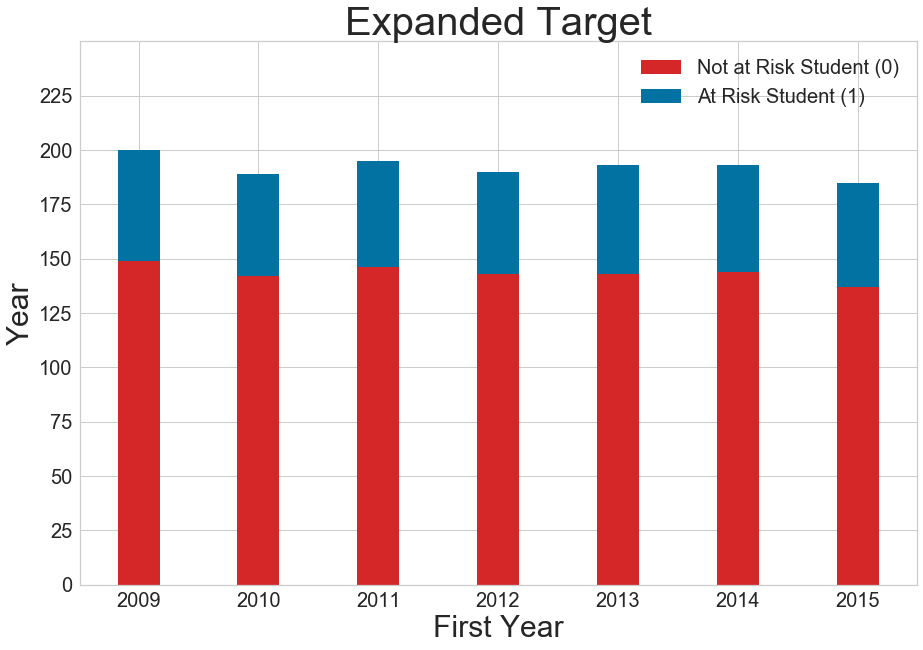

In [73]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))

import pylab as plot

params = {'legend.fontsize': 20,
          'legend.handlelength': 2}
plot.rcParams.update(params)



ind = np.array([0,1,2,3,4,5,6])
width = 0.35

p1 = plt.bar(ind, high_students, width, color='#d62728')
p2 = plt.bar(ind, low_students, width,
             bottom = high_students)


plt.ylabel('Year', fontsize = 30)
plt.xlabel('First Year', fontsize = 30)
plt.title('Expanded Target', fontsize = 40)
plt.xticks(ind, ('2009', '2010', '2011', '2012', '2013', '2014', '2015'), fontsize = 20)
plt.yticks(np.arange(0, 250, 25), fontsize =20)
plt.legend((p1[0], p2[0]), ('Not at Risk Student (0)', 'At Risk Student (1)'))
plt.ylim(0, 250)

plt.show()

In [74]:
data.danger_student.value_counts()


0    1004
1     341
Name: danger_student, dtype: int64